In [1]:
%matplotlib inline

In [1443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2203]:
import geometry

In [2204]:
reload(geometry)

<module 'geometry' from 'geometry.py'>

In [2205]:
from geometry import Point, Polygon, RegularPolygon, CircleList, RandomPolygon

In [1990]:
angles = np.linspace(0, np.pi * 2, 10)[:-1]
points = zip(np.cos(angles), np.sin(angles))

In [1991]:
p = Polygon([(0, 0), (1, 0), (1, 2), (0, 2)])

In [1816]:
p.points[0].x = 0.
p.points[0].y = 0.

In [1600]:
p.is_convex()

True

In [1601]:
p.area()

3.0207006182844958

In [1579]:
j = 2

In [1580]:
j

2

In [1992]:
p.area()

2.0

In [2915]:
def plot_poly(p, size=2, scatter=False):
    plt.figure(figsize=(5, 5))
    if scatter:
        x, y = p.scatter()
        plt.scatter(x, y)
    else:
        plt.plot(*p.lines())
        i = 0
        for point in p.points:
            plt.text(point.x, point.y, i, color="red")
            i += 1
    plt.ylim(-size, size)
    plt.xlim(-size, size)

In [ ]:
[  87.77145586  117.00919561   70.54508915   84.67425938]

In [2533]:
p = RegularPolygon(5)
p.points[0].y = 2.

In [2752]:
j % 5

2

In [2878]:
p.angles() * 180 / np.pi

array([  26.09425233,  102.33685987,   27.47881037,   69.28140295,
        134.80867447])

In [3039]:
p = RandomPolygon(5)

In [2951]:
p = Polygon([(0, np.sqrt(5)), (-1., 2.), (-1., -2.), (1., -2.)])

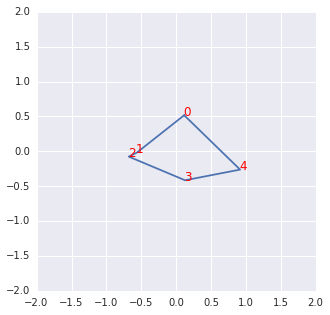

In [3040]:
p = p.flip(j % p.N)
j+=1

plot_poly(p, 2)

#

(-1, 1)

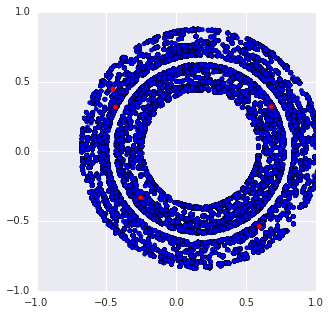

In [3042]:
plt.figure(figsize=(5, 5))
for i in range(10000):
#     p = p.flip(j % p.N)#int(np.random.random() * 7))
    p = p.flip(int(np.random.random() * len(p)))
    j += 1
    x, y = p.scatter()
    plt.scatter(x, y)
# print "CONVEX?", p.is_convex(), "AREA:", p.area()
# print p.angles() * 180 / np.pi
x, y = p.scatter()
plt.scatter(x, y, color='red')
plt.ylim((-1, 1))
plt.xlim((-1, 1))

# 1. Equal area
# 2. Equal set of side lengths $\{l_1, l_2, l_3...l_n\}$
# 3. ????

## 1 & 2 & 3 --> Some path of flips exists from shape 1 to shape 2

In [2926]:
np.mean(x), np.mean(y)

(-0.13444950650771734, 0.056836115678382593)

In [2181]:
self = p.points[0]

In [2182]:
a = self.before
b = self.after
c = self
ab = a - b
ac = a - c
if abs(ab * ac) < 1e-14 or abs(ab*ab) < 1e-14:
    dx = -1 * ac
else:
    dx = (ab * ac) / (ab * ab) * ab - ac
m = .5 * ab + b 
dy = c - m - dx
new = c - 2 * dy

In [2183]:
new

(1.00, -0.10)

In [2184]:
dy

(-0.00, -0.95)

In [2185]:
self

(1.00, -2.00)

In [2200]:
new

(1.00, 2.00)

In [2202]:
ac*ab, 

-1.9952090708056667

In [190]:
a1 = CircleList([1, 0, 0, 0, 0])

In [191]:
a2 = CircleList([0, 1, 0, 0, 0])

In [192]:
a1.equals(a2)

True

In [82]:
np.array(a1) - np.array(a2[2:] + a2[:2]) 

array([ -4.44089210e-16,   1.25663706e+00,   2.51327412e+00,
        -2.51327412e+00,  -1.25663706e+00])

In [60]:
a1, a2

([5.026548245743669,
  2.5132741228718349,
  1.2566370614359172,
  1.2566370614359172,
  2.5132741228718345],
 [1.2566370614359159,
  3.7699111843077522,
  5.026548245743669,
  5.0265482457436699,
  3.7699111843077517])

In [200]:
rl = self.before - self.after
rm = self.before - self
dx = (rl * rm) / (rl * rl) * rl - rm
new = self - 2 * dx

In [206]:
rl * rm < 1e-15

False

In [205]:
-1 * rm

(1.00, -0.00)

In [145]:
p.points[0].flip()

(-0.60, -0.80)

In [135]:
(p.points[0] - p.points[2]).x

-6.6613381477509392e-16

In [309]:
p.angles().sum() - 2 * np.pi

[0.9424777960769379, 2.199114857512855, 3.4557519189487724, 4.71238898038469, -0.3141592653589795]
[ 2.19911486  3.45575192  4.71238898 -0.31415927  0.9424778 ]


0.0

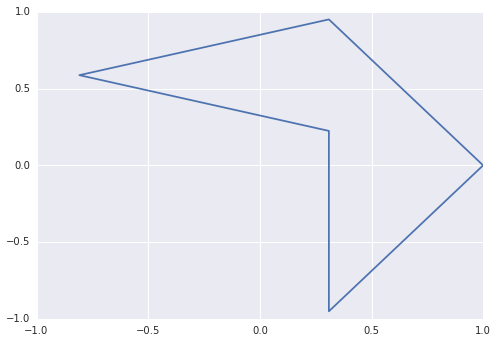

In [377]:
[ 5.02654825  2.51327412  1.25663706  1.25663706  2.51327412]

array([ 1.25663706,  1.25663706,  2.51327412,  5.02654825,  2.51327412])

In [369]:
(2,3) + (4,5)

(2, 3, 4, 5)

In [295]:
l = CircleList([1,2,3])

In [249]:
l.equals([2,3,1])

STARTING
[1, 2, 3]


True

In [278]:
x = p.points[0]

In [281]:
2 * (p.points[0] - p.points[1])

(1.38, -1.90)

In [2514]:
p = RandomPolygon(5)

In [2530]:
# plt.figure(figsize=(5, 5))
T = 10000
max_rs = np.zeros(T)
min_rs = np.zeros(T)
max_ds = np.zeros(T)
for i in range(T):
    p = RandomPolygon(10)
    rs = [a * a for a in p.points]
    ds = [(a-b) * (a-b) for a in p.points for b in p.points]
    max_ds[i] = max(ds)
    max_rs[i] = max(rs)
    min_rs[i] = min(rs)

(array([  3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   7.00000000e+00,   1.00000000e+00,
          5.00000000e+00,   1.00000000e+01,   7.00000000e+00,
          1.50000000e+01,   1.90000000e+01,   1.20000000e+01,
          1.60000000e+01,   2.70000000e+01,   1.70000000e+01,
          2.20000000e+01,   2.20000000e+01,   2.80000000e+01,
          3.20000000e+01,   3.70000000e+01,   5.40000000e+01,
          3.60000000e+01,   7.00000000e+01,   7.40000000e+01,
          9.20000000e+01,   8.70000000e+01,   1.20000000e+02,
          1.31000000e+02,   1.41000000e+02,   1.77000000e+02,
          1.65000000e+02,   2.08000000e+02,   2.32000000e+02,
          2.58000000e+02,   2.83000000e+02,   3.03000000e+02,
          4.06000000e+02,   4.30000000e+02,   4.39000000e+02,
          5.15000000e+02,   5.74000000e+02,   6.16000000e+02,
          6.84000000e+02,   7.76000000e+02,   8.43000000e+02,
        

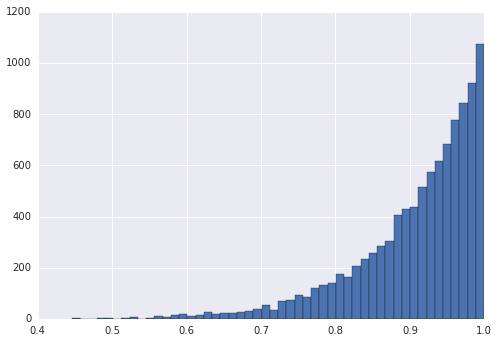

In [2529]:
plt.hist(np.sqrt(max_rs), bins=50);

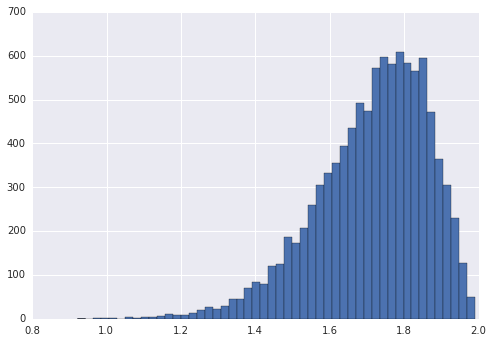

In [2532]:
plt.hist(np.sqrt(max_ds), bins=50);

In [2515]:
# plt.figure(figsize=(5, 5))
T = 5000
max_rs = np.zeros(T)
min_rs = np.zeros(T)
max_ds = np.zeros(T)
for i in range(T):
    r = np.random.random()
#     j = int(r *  len(p)) 
    j = i % len(p) 
    p = p.flip(j)
#     x, y = p.scatter()
    rs = [a * a for a in p.points]
    ds = [(a-b) * (a-b) for a in p.points for b in p.points]
    max_ds[i] = max(ds)
    max_rs[i] = max(rs)
    min_rs[i] = min(rs)
#     plt.scatter(x, y, alpha=.1)
max_d = np.sqrt(max_ds.max())
max_r = np.sqrt(max_rs.max())
min_r = np.sqrt(min_rs.min())

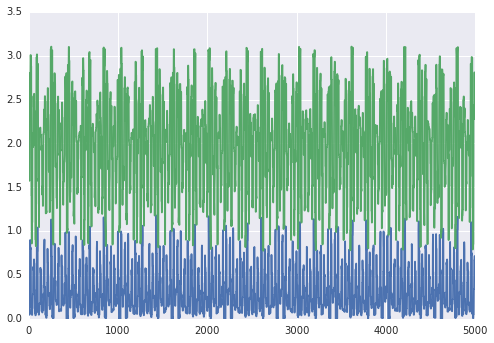

In [2516]:
plt.plot(min_rs)
plt.plot(max_rs)

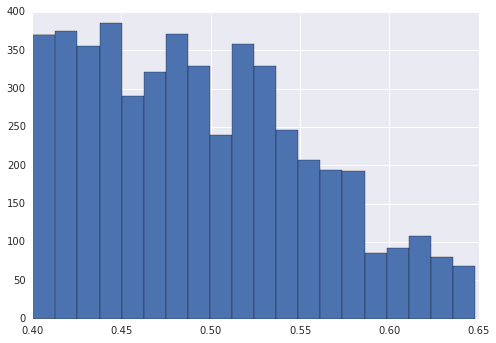

In [2507]:
plt.hist(min_rs, bins=20);

In [2517]:
min_r, max_r, max_d

(0.0096877082553496075, 1.7618303933293926, 2.2071145991856769)

In [2518]:
min_r**.5, max_r**.5, max_d**.5

(0.098426156357695929, 1.3273395923159199, 1.4856360924485097)

In [58]:
memo = dict()
def G(w, t):
    if (w, t) in memo:
        return memo[(w, t)]
    if t == 0:
        result = int(w==0)
    elif t >= 2*w + 1:
        result = 0
    else:
        result = .5 * G(w, t-1) + .5 * G(w-1, t-1)
    memo[(w, t)] = result
    return result

In [79]:
for i in range(400) :
    G(100, i)

In [80]:
memo

{(379, 314): 0.0,
 (252, 36): 0.0,
 (289, 22): 0.0,
 (399, 242): 0.0,
 (181, 159): 0.0,
 (238, 115): 0.0,
 (261, 146): 0.0,
 (351, 304): 0.0,
 (208, 66): 0.0,
 (171, 86): 0.0,
 (157, 23): 0.0,
 (360, 157): 0.0,
 (323, 275): 0.0,
 (90, 42): 0.0,
 (400, 235): 0.0,
 (399, 78): 0.0,
 (369, 81): 0.0,
 (332, 35): 0.0,
 (9, 0): 0,
 (318, 26): 0.0,
 (265, 110): 0.0,
 (251, 85): 0.0,
 (214, 91): 0.0,
 (380, 311): 0.0,
 (237, 90): 0.0,
 (184, 26): 0.0,
 (366, 262): 0.0,
 (49, 52): 4.6127546227126e-12,
 (312, 241): 0.0,
 (170, 21): 0.0,
 (189, 157): 0.0,
 (119, 90): 0.0,
 (185, 101): 0.0,
 (191, 146): 0.0,
 (322, 248): 0.0,
 (392, 356): 0.0,
 (52, 17): 0.0,
 (345, 9): 0.0,
 (398, 61): 0.0,
 (265, 250): 0.0,
 (331, 106): 0.0,
 (294, 114): 0.0,
 (308, 211): 0.0,
 (354, 201): 0.0,
 (227, 45): 0.0,
 (264, 33): 0.0,
 (181, 75): 0.0,
 (213, 2): 0.0,
 (160, 114): 0.0,
 (309, 145): 0.0,
 (309, 134): 0.0,
 (365, 327): 0.0,
 (261, 216): 0.0,
 (95, 98): 4.649325294319182e-25,
 (351, 244): 0.0,
 (298, 256): 

In [86]:
t, p = zip(*sorted([(t, memo[(w, t)] * (2*w - t + 1)) for w, t in memo if w == 100], key=lambda x: x[0]))

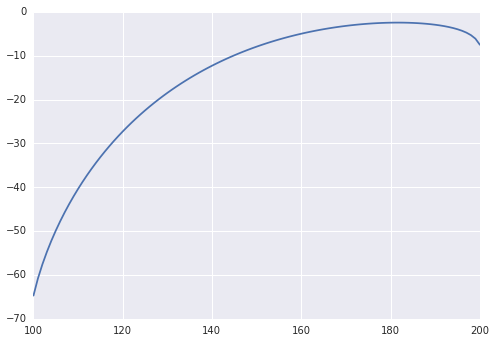

In [87]:
plt.plot(t, np.log(p))

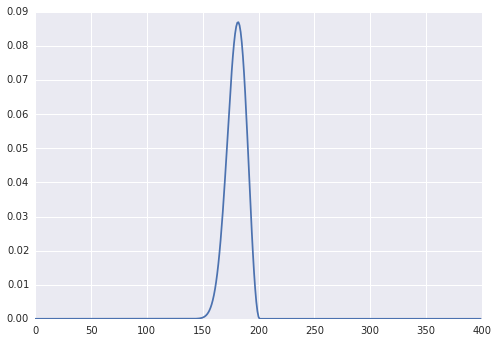

In [88]:
plt.plot(t, p)

In [ ]:
queue = [(0, 0)]
count = 0
while count < 1000:
    count += 1
    

In [89]:
def P(w, t):
    return G(w, t) * (2*w - t + 1)

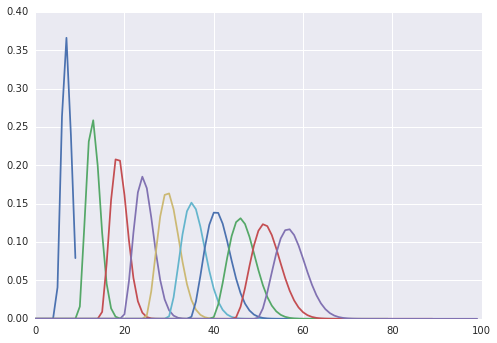

In [109]:
for j in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    plt.plot([P(x, j) for x in range(j)])


In [181]:
A = 10
B = 10
ps = np.zeros((A, B))
for i in range(A):
    for j in range(B):
        ps[i, j] = P(i, j)

In [175]:
ps.sum(axis=0)

array([ 1.        ,  0.5       ,  0.5       ,  0.375     ,  0.375     ,
        0.3125    ,  0.3125    ,  0.2734375 ,  0.2734375 ,  0.24609375])

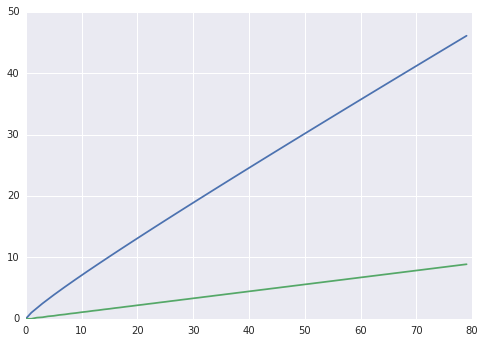

In [179]:
plt.plot(ms)
plt.plot(var)

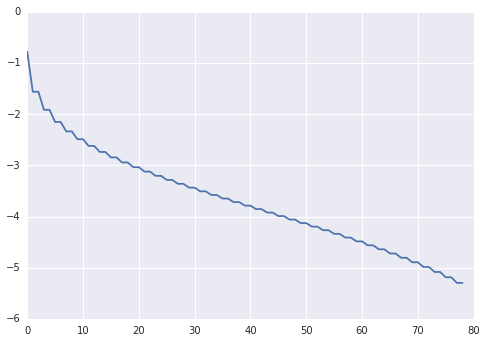

In [173]:
plt.plot(np.log(ms[1:] - ms[:-1] - (ms[1:] - ms[:-1])[-1] + .005))

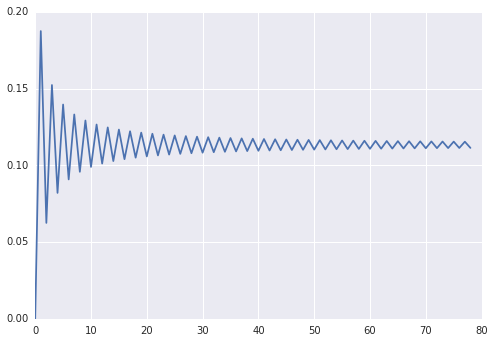

In [164]:
ms = (ps.transpose() * np.arange(A)).sum(axis=1)
msq = (ps.transpose() * np.arange(A)**2).sum(axis=1)
var = msq - ms**2
# plt.plot(ms)
plt.plot(var[1:] - var[:-1])
# plt.plot(ms / var)

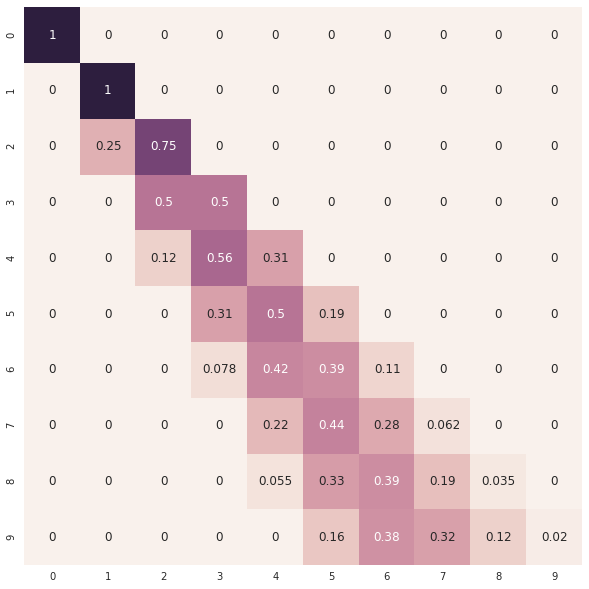

In [182]:
plt.figure(figsize=(10, 10))
sns.heatmap(ps.transpose(), annot=True, cbar=False)